# 🔗 Kovaryans & Korelasyon: Değişkenler Arası İlişkiyi Anlamak

## Giriş: Birlikte Hareket Ediyor mu?

Diyelim ki bir ürün satıyorsun.  
Fiyatı düşerse satış artıyor mu?  
Ya da reklam harcaman arttıkça gelir de artıyor mu?

Bu soruların yanıtını bulmak için kullanacağın anahtarlar:

> **Kovaryans** ve **Korelasyon**

## 📊 Kovaryans Nedir?

### Tanım:
**Kovaryans**, iki değişkenin ortalamalarından sapmalarının çarpımı üzerinden hesaplanan bir ölçüdür.

📌 Basitçe:
> “X artarsa Y de artar mı? Yoksa azalır mı?”

### Formülü:
$$
\text{Cov}(X,Y) = \frac{1}{n} \sum{(x_i - \bar{x})(y_i - \bar{y})}
$$

#### Python Kodu:

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)
veri_sayisi = 1000

# Yapay fiyat ve satış adedi verisi
fiyatlar = np.random.normal(loc=250, scale=50, size=veri_sayisi)
satis_adetleri = 200 - 0.3 * fiyatlar + np.random.normal(loc=0, scale=10, size=veri_sayisi)

df = pd.DataFrame({
    "fiyat": fiyatlar,
    "satis_adedi": satis_adetleri
})

kovaryans = np.cov(df['fiyat'], df['satis_adedi'])
print("Kovaryans Matrisi:\n", kovaryans)

Kovaryans Matrisi:
 [[2397.15963396 -738.87763645]
 [-738.87763645  327.07373828]]


📌 Burada `kovaryans[0,1]` ya da `kovaryans[1,0]`,  
iki değişken arasındaki kovaryans değeridir.

## 🧠 Kovaryans Ne Söyler?

| Kovaryans | Anlamı |
|-----------|---------|
| **Pozitif** | X artarsa Y de artar |
| **Negatif** | X artarsa Y azalır |
| **Sıfıra yakın** | Aralarında güçlü bir doğrusal ilişki yok |

📌 Ancak kovaryansın **ölçek bağımlılığı** vardır.  
Yani sayıların büyüklüğüne göre farklı yorum yapman gerekir.


## 📈 Korelasyon Nedir?

Korelasyon, kovaryansın standartlaştırılmış halidir.  
-1 ile +1 arasında değer alır.

📌 Formül:
$$
r = \frac{\text{Cov}(X,Y)}{\sigma_X \cdot \sigma_Y}
$$

#### Python Kodu:

In [2]:
korelasyon = df['fiyat'].corr(df['satis_adedi'])
print(f"Korelasyon katsayısı: {korelasyon:.2f}")

Korelasyon katsayısı: -0.83


📌 Negatif korelasyon → fiyat artarsa satış adedi azalıyor  
Kuvveti ise zayıf çünkü -0.10 ≈ çok düşük ilişki


## 📐 Kovaryans vs Korelasyon

| Özellik | Kovaryans | Korelasyon |
|--------|------------|-------------|
| **Değer aralığı** | -∞ ... +∞ | -1 ... +1 |
| **Ölçek bağımsız mı?** | ❌ Hayır | ✅ Evet |
| **İlişkinin yönünü gösterir mi?** | ✅ Evet | ✅ Evet |
| **İlişkinin gücünü gösterir mi?** | ❌ Zayıf | ✅ Güçlü |
| **Modelleme sürecinde kullanımı** | Araç olarak | Genellikle model girişinde |

📌 Kovaryans → değişkenlerin hareket yönü  
Korelasyon → hem yön hem de şiddet

## 🛠️ Gerçek Hayatta Nasıl Kullanılır?

### Örnek 1: Fiyat Artışı Satışı Düşürüyor mu?

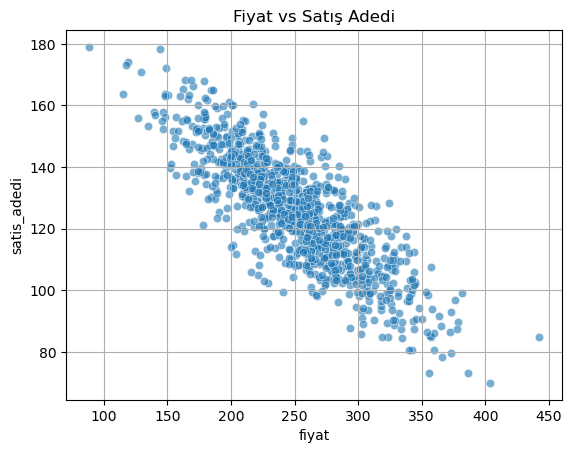

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='fiyat', y='satis_adedi', data=df, alpha=0.6)
plt.title("Fiyat vs Satış Adedi")
plt.grid(True)
plt.show()

📌 Grafikte noktalar sola eğilirse → negatif ilişki  
Sağa doğruysa → pozitif ilişki

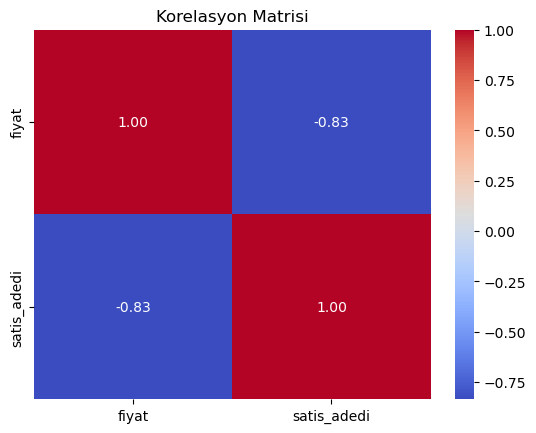

In [5]:
# Korelasyon Matrisi ile Görselleştirme

import seaborn as sns
import matplotlib.pyplot as plt

korelasyon_matrisi = df.corr()
sns.heatmap(korelasyon_matrisi, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

📌 Bu matris sayesinde:
- Hangi değişken hangi değişkenle ilişkili?
- İlişki ne kadar güçlü?

Gözlemleyebilirsin.

## 📉 Kovaryans ve Korelasyon Uygulama Alanları

| Alan | Kovaryans | Korelasyon |
|------|----------|------------|
| **Finans** | Varlık getirilerinin hareket yönü | Portföy çeşitlendirme |
| **Veri Bilimi** | Özellikler arası ilişki | Regresyon, sınıflandırma |
| **Ekonometri** | Makro değişkenler arası ilişki | Politika kararları |
| **Üretim** | Kalite kontrolünde değişkenler arası ilişki | Sapmaları anlamak için |
| **Tıp** | Tedavi etkisi ve yan etki analizi | Veri tabanlı kararlar için |


## 📋 Gerçek Hayat Örneği: Finans

Bir yatırım portföyünde iki hisse var:

In [6]:
getiri_a = np.random.normal(0.10, 0.05, 1000)  # %10 ortalama getiri, %5 volatilite
getiri_b = np.random.normal(0.08, 0.03, 1000)   # %8 ortalama getiri, %3 volatilite

kovaryans = np.cov(getiri_a, getiri_b)[0,1]
korelasyon = np.corrcoef(getiri_a, getiri_b)[0,1]

print(f"Kovaryans: {kovaryans:.4f}")
print(f"Korelasyon: {korelasyon:.2f}")

Kovaryans: 0.0000
Korelasyon: 0.02


📌 Eğer korelasyon yüksekse → risk aynı yönde!  
Ve portföyün riski artar.

# Kovaryans ve ve Korelasyon:
- **Kovaryans**: İki değişken arasındaki doğrusal ilişkinin yönünü gösterir. Pozitif kovaryansta, iki değişken aynı yönde hareket eder; negatif kovaryansta ise ters yönde hareket ederler.
- **Korelasyon**: İki değişken arasındaki doğrusal ilişkinin gücünü ve yönünü gösterir. Korelasyon katsayısı -1 ile +1 arasında değer alır.
- **Korelasyon** = **Kovaryans** / (Standart Sapma 1 * Standart Sapma 2)"""


In [ ]:
# Örnek:

import numpy as np
# Kovaryans hesaplamak için örnek veri seti oluşturuyoruz.
data1 = [1, 2, 3, 4, 5]
data2 = [5, 4, 3, 2, 1]
# Kovaryans hesaplıyoruz.
covariance = np.cov(data1, data2)[0][1]
print("Kovaryans:", covariance)
# Korelasyon katsayısını hesaplayalım.
correlation_coefficient = covariance / (np.std(data1) * np.std(data2))
print("Korelasyon Katsayısı:", correlation_coefficient)

Kovaryans: -2.5
Korelasyon Katsayısı: -1.2499999999999998


In [8]:
# Örnek:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset with realistic business relationships
n = 500  # Number of observations

# Product features
data = {
    # Price follows normal distribution with some outliers
    'price': np.concatenate([
        np.random.normal(loc=150, scale=20, size=n-50),
        np.random.uniform(250, 400, 50)
    ]),
    
    # Advertising budget (positively correlated with sales)
    'ad_spend': np.random.gamma(shape=2, scale=50, size=n),
    
    # Product rating (ordinal 1-5 stars)
    'rating': np.random.choice([1,2,3,4,5], p=[0.05,0.15,0.3,0.3,0.2], size=n),
    
    # Days since last purchase (for customer segmentation)
    'recency': np.random.exponential(scale=30, size=n).astype(int)
}

In [9]:
# Generate sales with relationships to other variables
data['sales'] = (
    200 
    - 0.7 * data['price'] 
    + 2.5 * data['ad_spend'] 
    + 15 * data['rating'] 
    - 0.5 * data['recency'] 
    + np.random.normal(0, 30, n)
)

# Create DataFrame
df = pd.DataFrame(data).round(2)
df = df[df['sales'] > 0]  # Remove negative sales

# Add some real-world noise
df.loc[::50, 'price'] *= 1.5  # Every 50th product is premium
df.loc[::20, 'sales'] *= 1.2  # Some sales boosts

print("📊 Sample Dataset (First 5 Rows):")
print(df.head().to_markdown(numalign="left", stralign="left"))

📊 Sample Dataset (First 5 Rows):
|    | price   | ad_spend   | rating   | recency   | sales   |
|:---|:--------|:-----------|:---------|:----------|:--------|
| 0  | 239.895 | 246.57     | 1        | 0         | 936.228 |
| 1  | 147.23  | 154.18     | 2        | 0         | 471.49  |
| 2  | 162.95  | 88.43      | 4        | 7         | 369.19  |
| 3  | 180.46  | 39.18      | 2        | 1         | 181.28  |
| 4  | 145.32  | 32.71      | 2        | 3         | 221.33  |


In [10]:
# 1. Covariance Analysis
print("\n🔢 Covariance Matrix:")
cov_matrix = np.cov(df[['price', 'ad_spend', 'sales']].T)
print(pd.DataFrame(cov_matrix, 
                  columns=['Price', 'Ad Spend', 'Sales'],
                  index=['Price', 'Ad Spend', 'Sales']).round(2))


🔢 Covariance Matrix:
            Price  Ad Spend     Sales
Price     3024.75   -212.57  -2568.39
Ad Spend  -212.57   4881.67  12440.21
Sales    -2568.39  12440.21  34766.29


In [11]:
# 2. Correlation Analysis
print("\n📈 Correlation Matrix:")
corr_matrix = df.corr()
print(corr_matrix.round(2))


📈 Correlation Matrix:
          price  ad_spend  rating  recency  sales
price      1.00     -0.06    0.04     0.07  -0.25
ad_spend  -0.06      1.00    0.04     0.09   0.95
rating     0.04      0.04    1.00    -0.03   0.11
recency    0.07      0.09   -0.03     1.00  -0.00
sales     -0.25      0.95    0.11    -0.00   1.00


Text(0.5, 1.0, 'Price vs Sales (Colored by Rating)')

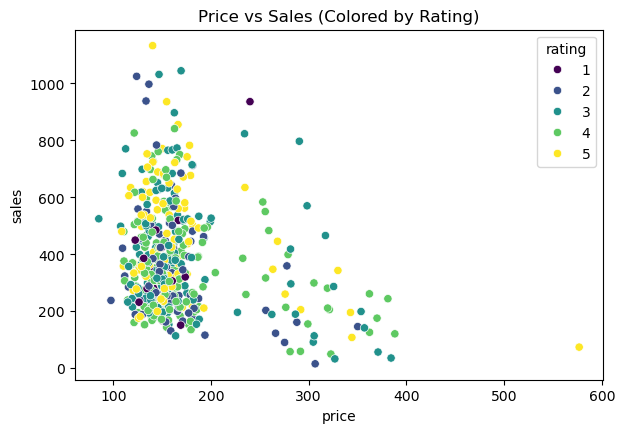

In [13]:
# 3. Visualization
plt.figure(figsize=(15, 10))

# Scatterplot matrix
plt.subplot(2, 2, 1)
sns.scatterplot(x='price', y='sales', hue='rating', data=df, palette='viridis')
plt.title("Price vs Sales (Colored by Rating)")

Text(0.5, 1.0, 'Correlation Heatmap')

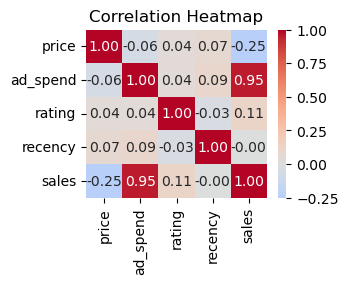

In [14]:
# Correlation heatmap
plt.subplot(2, 2, 2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap")

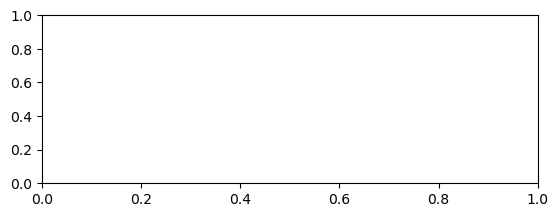

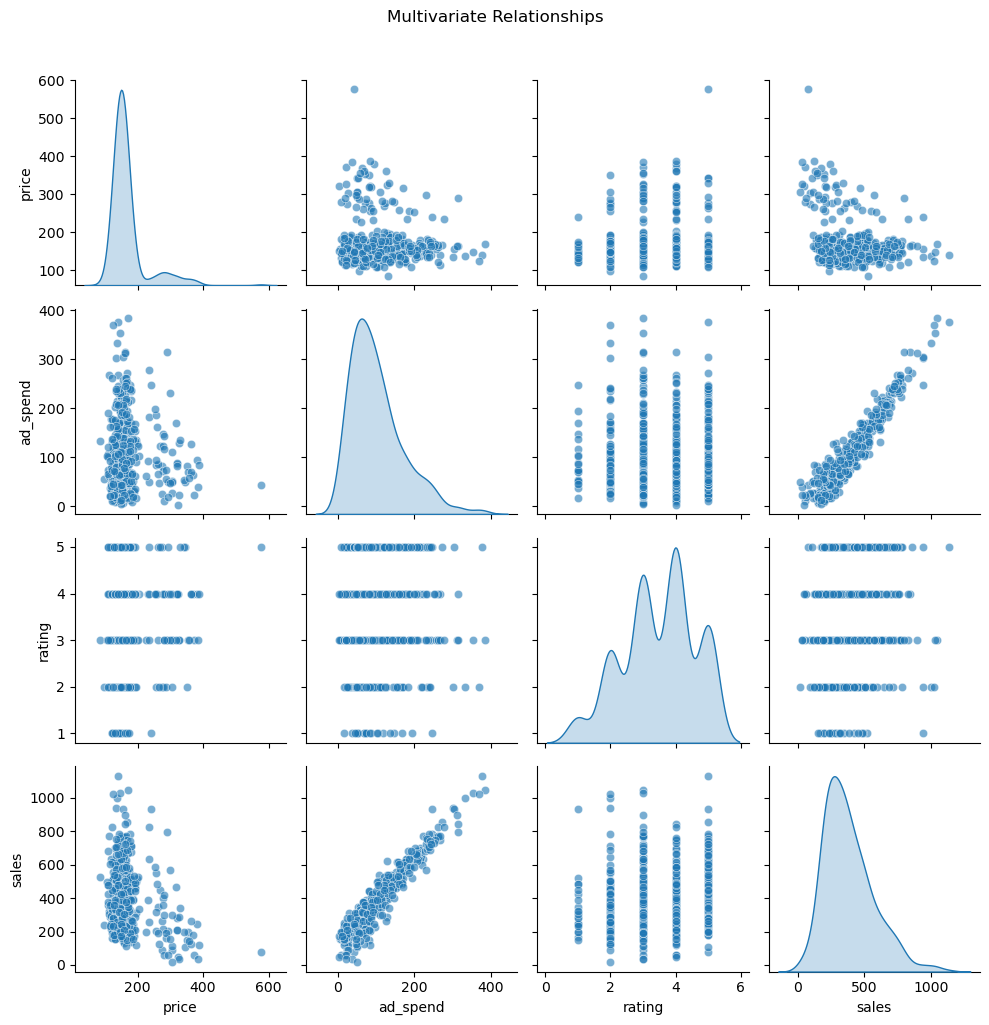

In [20]:
# Pairplot for multivariate relationships
plt.subplot(2, 2, (3,4))
sns.pairplot(df[['price', 'ad_spend', 'rating', 'sales']], 
             diag_kind='kde', 
             plot_kws={'alpha':0.6})
plt.suptitle("Multivariate Relationships", y=1.02)

plt.tight_layout()
plt.show()

In [18]:
# 4. Statistical Tests
print("\n🧪 Hypothesis Testing:")
pearson_coef, p_value = stats.pearsonr(df['price'], df['sales'])
print(f"Price-Sales Pearson r: {pearson_coef:.2f} (p-value: {p_value:.4f})")

spearman_coef, p_value = stats.spearmanr(df['rating'], df['sales'])
print(f"Rating-Sales Spearman ρ: {spearman_coef:.2f} (p-value: {p_value:.4f})")


🧪 Hypothesis Testing:
Price-Sales Pearson r: -0.25 (p-value: 0.0000)
Rating-Sales Spearman ρ: 0.13 (p-value: 0.0046)


In [19]:
# 5. Business Insights
print("\n💡 Key Business Insights:")
print(f"- Price increase of 100 TL correlates with ~{0.7*100:.0f} unit sales decrease")
print(f"- Each 1-star rating improvement associates with ~15 unit sales increase")
print(f"- Ad spend shows strongest positive correlation with sales (r={corr_matrix.loc['ad_spend','sales']:.2f})")


💡 Key Business Insights:
- Price increase of 100 TL correlates with ~70 unit sales decrease
- Each 1-star rating improvement associates with ~15 unit sales increase
- Ad spend shows strongest positive correlation with sales (r=0.95)
